In [1]:
from matmul_numpy import normal_matmul, binet_matmul, strassen_matmul
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def timeit(func, *args, **kwargs):
    import time
    start = time.perf_counter()
    func(*args, **kwargs)
    return 1e3 * (time.perf_counter() - start)

In [3]:
normal_times = []
binet_times = []
strassen_times = []
matrix_sizes = []
exponents = list(range(2, 9))

for exp in list(exponents):
    print(exp, end=" \r")
    A = np.random.rand(2**exp, 2**exp)
    B = np.random.rand(2**exp, 2**exp)
    
    matrix_sizes.append(2**exp)
    normal_times.append(timeit(normal_matmul, A, B))
    binet_times.append(timeit(binet_matmul, A, B))
    strassen_times.append(timeit(strassen_matmul, A, B))

Text(0, 0.5, 'Time (ms)')

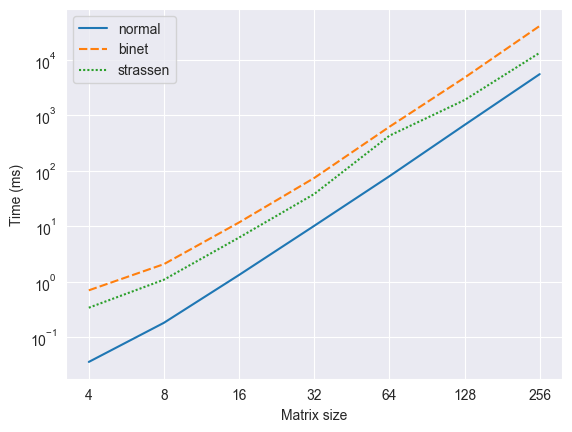

In [4]:
results  = pd.DataFrame(
    index=exponents,
    data={
        'normal': normal_times,
        'binet': binet_times,
        'strassen': strassen_times
    }
)
sns.lineplot(results)
plt.yscale('log')
plt.xticks(exponents, matrix_sizes, minor=False)
plt.xlabel('Matrix size')
plt.ylabel('Time (ms)')